## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 51.9ms	remaining: 51.9s
1:	learn: 0.9301086	total: 55.7ms	remaining: 27.8s
2:	learn: 0.9005637	total: 59.2ms	remaining: 19.7s
3:	learn: 0.8720983	total: 62.9ms	remaining: 15.7s
4:	learn: 0.8467410	total: 66.3ms	remaining: 13.2s
5:	learn: 0.8226672	total: 69.3ms	remaining: 11.5s
6:	learn: 0.7994702	total: 72.3ms	remaining: 10.3s
7:	learn: 0.7784272	total: 75.3ms	remaining: 9.34s
8:	learn: 0.7602192	total: 78.4ms	remaining: 8.63s
9:	learn: 0.7412421	total: 81.5ms	remaining: 8.07s
10:	learn: 0.7247930	total: 84.6ms	remaining: 7.61s
11:	learn: 0.7089951	total: 87.9ms	remaining: 7.24s
12:	learn: 0.6951345	total: 91ms	remaining: 6.91s
13:	learn: 0.6809276	total: 94ms	remaining: 6.62s
14:	learn: 0.6692630	total: 97.2ms	remaining: 6.38s
15:	learn: 0.6588323	total: 100ms	remaining: 6.17s
16:	learn: 0.6472700	total: 104ms	remaining: 5.99s
17:	learn: 0.6379982	total: 107ms	remaining: 5.83s
18:	learn: 0.6294674	total: 110ms	remaining: 5.68s


42:	learn: 0.5141148	total: 186ms	remaining: 4.13s
43:	learn: 0.5116444	total: 189ms	remaining: 4.1s
44:	learn: 0.5100547	total: 192ms	remaining: 4.07s
45:	learn: 0.5069096	total: 195ms	remaining: 4.05s
46:	learn: 0.5051685	total: 199ms	remaining: 4.03s
47:	learn: 0.5033968	total: 202ms	remaining: 4s
48:	learn: 0.5012433	total: 205ms	remaining: 3.98s
49:	learn: 0.4986132	total: 208ms	remaining: 3.96s
50:	learn: 0.4968022	total: 212ms	remaining: 3.94s
51:	learn: 0.4951632	total: 215ms	remaining: 3.91s
52:	learn: 0.4928924	total: 218ms	remaining: 3.89s
53:	learn: 0.4917272	total: 221ms	remaining: 3.87s
54:	learn: 0.4895079	total: 224ms	remaining: 3.85s
55:	learn: 0.4881884	total: 227ms	remaining: 3.83s
56:	learn: 0.4861566	total: 230ms	remaining: 3.81s
57:	learn: 0.4850201	total: 233ms	remaining: 3.79s
58:	learn: 0.4840055	total: 236ms	remaining: 3.77s
59:	learn: 0.4824455	total: 239ms	remaining: 3.75s
60:	learn: 0.4809744	total: 242ms	remaining: 3.73s
61:	learn: 0.4801376	total: 246ms	r

104:	learn: 0.4461730	total: 379ms	remaining: 3.23s
105:	learn: 0.4457259	total: 382ms	remaining: 3.22s
106:	learn: 0.4451085	total: 385ms	remaining: 3.21s
107:	learn: 0.4447909	total: 388ms	remaining: 3.21s
108:	learn: 0.4440936	total: 391ms	remaining: 3.2s
109:	learn: 0.4435519	total: 395ms	remaining: 3.19s
110:	learn: 0.4431075	total: 397ms	remaining: 3.18s
111:	learn: 0.4425498	total: 400ms	remaining: 3.17s
112:	learn: 0.4419106	total: 404ms	remaining: 3.17s
113:	learn: 0.4414425	total: 406ms	remaining: 3.16s
114:	learn: 0.4407446	total: 409ms	remaining: 3.15s
115:	learn: 0.4402011	total: 413ms	remaining: 3.14s
116:	learn: 0.4398559	total: 415ms	remaining: 3.13s
117:	learn: 0.4392990	total: 419ms	remaining: 3.13s
118:	learn: 0.4389153	total: 422ms	remaining: 3.12s
119:	learn: 0.4383331	total: 425ms	remaining: 3.12s
120:	learn: 0.4378136	total: 428ms	remaining: 3.11s
121:	learn: 0.4375553	total: 431ms	remaining: 3.1s
122:	learn: 0.4369995	total: 434ms	remaining: 3.09s
123:	learn: 0.

165:	learn: 0.4180680	total: 568ms	remaining: 2.85s
166:	learn: 0.4176884	total: 571ms	remaining: 2.85s
167:	learn: 0.4173026	total: 574ms	remaining: 2.84s
168:	learn: 0.4170486	total: 577ms	remaining: 2.84s
169:	learn: 0.4165960	total: 580ms	remaining: 2.83s
170:	learn: 0.4161870	total: 583ms	remaining: 2.83s
171:	learn: 0.4156228	total: 586ms	remaining: 2.82s
172:	learn: 0.4153041	total: 590ms	remaining: 2.82s
173:	learn: 0.4148857	total: 593ms	remaining: 2.81s
174:	learn: 0.4144190	total: 596ms	remaining: 2.81s
175:	learn: 0.4140875	total: 599ms	remaining: 2.8s
176:	learn: 0.4136755	total: 602ms	remaining: 2.8s
177:	learn: 0.4133860	total: 605ms	remaining: 2.8s
178:	learn: 0.4129780	total: 609ms	remaining: 2.79s
179:	learn: 0.4122907	total: 612ms	remaining: 2.79s
180:	learn: 0.4119188	total: 615ms	remaining: 2.78s
181:	learn: 0.4115412	total: 618ms	remaining: 2.78s
182:	learn: 0.4112620	total: 622ms	remaining: 2.78s
183:	learn: 0.4107734	total: 625ms	remaining: 2.77s
184:	learn: 0.4

227:	learn: 0.3965787	total: 760ms	remaining: 2.57s
228:	learn: 0.3963073	total: 764ms	remaining: 2.57s
229:	learn: 0.3960925	total: 767ms	remaining: 2.57s
230:	learn: 0.3957018	total: 770ms	remaining: 2.56s
231:	learn: 0.3954162	total: 773ms	remaining: 2.56s
232:	learn: 0.3951665	total: 776ms	remaining: 2.55s
233:	learn: 0.3949269	total: 779ms	remaining: 2.55s
234:	learn: 0.3945894	total: 782ms	remaining: 2.54s
235:	learn: 0.3944181	total: 785ms	remaining: 2.54s
236:	learn: 0.3941497	total: 788ms	remaining: 2.54s
237:	learn: 0.3939819	total: 791ms	remaining: 2.53s
238:	learn: 0.3938322	total: 795ms	remaining: 2.53s
239:	learn: 0.3935463	total: 798ms	remaining: 2.53s
240:	learn: 0.3933166	total: 801ms	remaining: 2.52s
241:	learn: 0.3930992	total: 804ms	remaining: 2.52s
242:	learn: 0.3928898	total: 807ms	remaining: 2.51s
243:	learn: 0.3926199	total: 810ms	remaining: 2.51s
244:	learn: 0.3923955	total: 813ms	remaining: 2.5s
245:	learn: 0.3922312	total: 816ms	remaining: 2.5s
246:	learn: 0.

289:	learn: 0.3817667	total: 954ms	remaining: 2.33s
290:	learn: 0.3815253	total: 957ms	remaining: 2.33s
291:	learn: 0.3813529	total: 960ms	remaining: 2.33s
292:	learn: 0.3812172	total: 963ms	remaining: 2.32s
293:	learn: 0.3809978	total: 966ms	remaining: 2.32s
294:	learn: 0.3807825	total: 969ms	remaining: 2.32s
295:	learn: 0.3805940	total: 972ms	remaining: 2.31s
296:	learn: 0.3801959	total: 976ms	remaining: 2.31s
297:	learn: 0.3799439	total: 979ms	remaining: 2.31s
298:	learn: 0.3797228	total: 982ms	remaining: 2.3s
299:	learn: 0.3795554	total: 985ms	remaining: 2.3s
300:	learn: 0.3793733	total: 988ms	remaining: 2.29s
301:	learn: 0.3791607	total: 992ms	remaining: 2.29s
302:	learn: 0.3789297	total: 995ms	remaining: 2.29s
303:	learn: 0.3787482	total: 999ms	remaining: 2.29s
304:	learn: 0.3786528	total: 1s	remaining: 2.28s
305:	learn: 0.3784406	total: 1s	remaining: 2.28s
306:	learn: 0.3782934	total: 1.01s	remaining: 2.27s
307:	learn: 0.3781631	total: 1.01s	remaining: 2.27s
308:	learn: 0.377927

350:	learn: 0.3700067	total: 1.14s	remaining: 2.12s
351:	learn: 0.3698930	total: 1.15s	remaining: 2.11s
352:	learn: 0.3697314	total: 1.15s	remaining: 2.11s
353:	learn: 0.3695617	total: 1.15s	remaining: 2.1s
354:	learn: 0.3694397	total: 1.16s	remaining: 2.1s
355:	learn: 0.3692589	total: 1.16s	remaining: 2.1s
356:	learn: 0.3691107	total: 1.16s	remaining: 2.1s
357:	learn: 0.3689645	total: 1.17s	remaining: 2.09s
358:	learn: 0.3687886	total: 1.17s	remaining: 2.09s
359:	learn: 0.3686485	total: 1.17s	remaining: 2.08s
360:	learn: 0.3685749	total: 1.18s	remaining: 2.08s
361:	learn: 0.3683909	total: 1.18s	remaining: 2.08s
362:	learn: 0.3682710	total: 1.18s	remaining: 2.07s
363:	learn: 0.3681254	total: 1.18s	remaining: 2.07s
364:	learn: 0.3679761	total: 1.19s	remaining: 2.07s
365:	learn: 0.3677932	total: 1.19s	remaining: 2.06s
366:	learn: 0.3676022	total: 1.19s	remaining: 2.06s
367:	learn: 0.3674148	total: 1.2s	remaining: 2.06s
368:	learn: 0.3673439	total: 1.2s	remaining: 2.05s
369:	learn: 0.3671

412:	learn: 0.3602055	total: 1.34s	remaining: 1.9s
413:	learn: 0.3599094	total: 1.34s	remaining: 1.9s
414:	learn: 0.3597887	total: 1.34s	remaining: 1.9s
415:	learn: 0.3595791	total: 1.35s	remaining: 1.89s
416:	learn: 0.3594487	total: 1.35s	remaining: 1.89s
417:	learn: 0.3592759	total: 1.35s	remaining: 1.89s
418:	learn: 0.3591088	total: 1.36s	remaining: 1.88s
419:	learn: 0.3589470	total: 1.36s	remaining: 1.88s
420:	learn: 0.3587972	total: 1.36s	remaining: 1.87s
421:	learn: 0.3586831	total: 1.37s	remaining: 1.87s
422:	learn: 0.3585620	total: 1.37s	remaining: 1.87s
423:	learn: 0.3584427	total: 1.37s	remaining: 1.86s
424:	learn: 0.3583044	total: 1.38s	remaining: 1.86s
425:	learn: 0.3581698	total: 1.38s	remaining: 1.86s
426:	learn: 0.3580461	total: 1.38s	remaining: 1.85s
427:	learn: 0.3579182	total: 1.39s	remaining: 1.85s
428:	learn: 0.3577521	total: 1.39s	remaining: 1.85s
429:	learn: 0.3576138	total: 1.39s	remaining: 1.84s
430:	learn: 0.3575528	total: 1.39s	remaining: 1.84s
431:	learn: 0.3

474:	learn: 0.3513843	total: 1.53s	remaining: 1.69s
475:	learn: 0.3512406	total: 1.53s	remaining: 1.69s
476:	learn: 0.3510044	total: 1.54s	remaining: 1.68s
477:	learn: 0.3509121	total: 1.54s	remaining: 1.68s
478:	learn: 0.3507270	total: 1.54s	remaining: 1.68s
479:	learn: 0.3506003	total: 1.54s	remaining: 1.67s
480:	learn: 0.3505111	total: 1.55s	remaining: 1.67s
481:	learn: 0.3503906	total: 1.55s	remaining: 1.67s
482:	learn: 0.3501522	total: 1.55s	remaining: 1.66s
483:	learn: 0.3500494	total: 1.56s	remaining: 1.66s
484:	learn: 0.3498921	total: 1.56s	remaining: 1.66s
485:	learn: 0.3497143	total: 1.56s	remaining: 1.65s
486:	learn: 0.3496172	total: 1.57s	remaining: 1.66s
487:	learn: 0.3494609	total: 1.58s	remaining: 1.66s
488:	learn: 0.3493200	total: 1.58s	remaining: 1.66s
489:	learn: 0.3491550	total: 1.59s	remaining: 1.65s
490:	learn: 0.3490323	total: 1.59s	remaining: 1.65s
491:	learn: 0.3488767	total: 1.6s	remaining: 1.65s
492:	learn: 0.3487285	total: 1.6s	remaining: 1.65s
493:	learn: 0.

530:	learn: 0.3439546	total: 1.72s	remaining: 1.52s
531:	learn: 0.3438254	total: 1.72s	remaining: 1.52s
532:	learn: 0.3437049	total: 1.73s	remaining: 1.51s
533:	learn: 0.3435053	total: 1.73s	remaining: 1.51s
534:	learn: 0.3433236	total: 1.73s	remaining: 1.51s
535:	learn: 0.3432219	total: 1.74s	remaining: 1.5s
536:	learn: 0.3431615	total: 1.74s	remaining: 1.5s
537:	learn: 0.3430198	total: 1.74s	remaining: 1.5s
538:	learn: 0.3429422	total: 1.75s	remaining: 1.49s
539:	learn: 0.3428024	total: 1.75s	remaining: 1.49s
540:	learn: 0.3426641	total: 1.75s	remaining: 1.49s
541:	learn: 0.3425885	total: 1.75s	remaining: 1.48s
542:	learn: 0.3424695	total: 1.76s	remaining: 1.48s
543:	learn: 0.3423997	total: 1.76s	remaining: 1.48s
544:	learn: 0.3422315	total: 1.76s	remaining: 1.47s
545:	learn: 0.3421242	total: 1.77s	remaining: 1.47s
546:	learn: 0.3419673	total: 1.77s	remaining: 1.47s
547:	learn: 0.3418121	total: 1.77s	remaining: 1.46s
548:	learn: 0.3416228	total: 1.78s	remaining: 1.46s
549:	learn: 0.3

593:	learn: 0.3370368	total: 1.91s	remaining: 1.31s
594:	learn: 0.3368150	total: 1.92s	remaining: 1.3s
595:	learn: 0.3367491	total: 1.92s	remaining: 1.3s
596:	learn: 0.3366496	total: 1.92s	remaining: 1.3s
597:	learn: 0.3365561	total: 1.93s	remaining: 1.29s
598:	learn: 0.3364801	total: 1.93s	remaining: 1.29s
599:	learn: 0.3363937	total: 1.93s	remaining: 1.29s
600:	learn: 0.3363054	total: 1.94s	remaining: 1.28s
601:	learn: 0.3361892	total: 1.94s	remaining: 1.28s
602:	learn: 0.3360683	total: 1.94s	remaining: 1.28s
603:	learn: 0.3359807	total: 1.94s	remaining: 1.27s
604:	learn: 0.3359096	total: 1.95s	remaining: 1.27s
605:	learn: 0.3358268	total: 1.95s	remaining: 1.27s
606:	learn: 0.3356597	total: 1.95s	remaining: 1.26s
607:	learn: 0.3355448	total: 1.96s	remaining: 1.26s
608:	learn: 0.3354512	total: 1.96s	remaining: 1.26s
609:	learn: 0.3353398	total: 1.96s	remaining: 1.25s
610:	learn: 0.3352669	total: 1.97s	remaining: 1.25s
611:	learn: 0.3351716	total: 1.97s	remaining: 1.25s
612:	learn: 0.3

654:	learn: 0.3307342	total: 2.1s	remaining: 1.11s
655:	learn: 0.3306809	total: 2.11s	remaining: 1.1s
656:	learn: 0.3305729	total: 2.11s	remaining: 1.1s
657:	learn: 0.3304900	total: 2.11s	remaining: 1.1s
658:	learn: 0.3303842	total: 2.12s	remaining: 1.09s
659:	learn: 0.3302235	total: 2.12s	remaining: 1.09s
660:	learn: 0.3300983	total: 2.12s	remaining: 1.09s
661:	learn: 0.3299994	total: 2.13s	remaining: 1.08s
662:	learn: 0.3299184	total: 2.13s	remaining: 1.08s
663:	learn: 0.3298189	total: 2.13s	remaining: 1.08s
664:	learn: 0.3296970	total: 2.13s	remaining: 1.07s
665:	learn: 0.3296671	total: 2.14s	remaining: 1.07s
666:	learn: 0.3295999	total: 2.14s	remaining: 1.07s
667:	learn: 0.3295390	total: 2.14s	remaining: 1.06s
668:	learn: 0.3294195	total: 2.15s	remaining: 1.06s
669:	learn: 0.3293185	total: 2.15s	remaining: 1.06s
670:	learn: 0.3292086	total: 2.15s	remaining: 1.06s
671:	learn: 0.3289913	total: 2.16s	remaining: 1.05s
672:	learn: 0.3288859	total: 2.16s	remaining: 1.05s
673:	learn: 0.32

714:	learn: 0.3251186	total: 2.29s	remaining: 914ms
715:	learn: 0.3250323	total: 2.3s	remaining: 911ms
716:	learn: 0.3249511	total: 2.3s	remaining: 908ms
717:	learn: 0.3248372	total: 2.3s	remaining: 904ms
718:	learn: 0.3247371	total: 2.31s	remaining: 901ms
719:	learn: 0.3246676	total: 2.31s	remaining: 898ms
720:	learn: 0.3245862	total: 2.31s	remaining: 895ms
721:	learn: 0.3245270	total: 2.31s	remaining: 891ms
722:	learn: 0.3244558	total: 2.32s	remaining: 888ms
723:	learn: 0.3243835	total: 2.32s	remaining: 885ms
724:	learn: 0.3242957	total: 2.32s	remaining: 882ms
725:	learn: 0.3242628	total: 2.33s	remaining: 878ms
726:	learn: 0.3242076	total: 2.33s	remaining: 875ms
727:	learn: 0.3240923	total: 2.33s	remaining: 872ms
728:	learn: 0.3240148	total: 2.34s	remaining: 869ms
729:	learn: 0.3239014	total: 2.34s	remaining: 865ms
730:	learn: 0.3237918	total: 2.34s	remaining: 862ms
731:	learn: 0.3236654	total: 2.35s	remaining: 859ms
732:	learn: 0.3235938	total: 2.35s	remaining: 856ms
733:	learn: 0.3

775:	learn: 0.3198135	total: 2.48s	remaining: 717ms
776:	learn: 0.3197430	total: 2.48s	remaining: 713ms
777:	learn: 0.3196478	total: 2.49s	remaining: 710ms
778:	learn: 0.3194714	total: 2.49s	remaining: 707ms
779:	learn: 0.3194042	total: 2.5s	remaining: 704ms
780:	learn: 0.3193209	total: 2.5s	remaining: 701ms
781:	learn: 0.3192009	total: 2.5s	remaining: 697ms
782:	learn: 0.3191109	total: 2.5s	remaining: 694ms
783:	learn: 0.3190255	total: 2.51s	remaining: 691ms
784:	learn: 0.3189403	total: 2.51s	remaining: 688ms
785:	learn: 0.3188715	total: 2.51s	remaining: 684ms
786:	learn: 0.3188016	total: 2.52s	remaining: 681ms
787:	learn: 0.3187670	total: 2.52s	remaining: 678ms
788:	learn: 0.3186601	total: 2.52s	remaining: 675ms
789:	learn: 0.3185886	total: 2.53s	remaining: 672ms
790:	learn: 0.3185418	total: 2.53s	remaining: 668ms
791:	learn: 0.3184514	total: 2.53s	remaining: 665ms
792:	learn: 0.3183529	total: 2.54s	remaining: 662ms
793:	learn: 0.3182569	total: 2.54s	remaining: 659ms
794:	learn: 0.31

836:	learn: 0.3147707	total: 2.67s	remaining: 521ms
837:	learn: 0.3147022	total: 2.68s	remaining: 518ms
838:	learn: 0.3145737	total: 2.68s	remaining: 514ms
839:	learn: 0.3144908	total: 2.68s	remaining: 511ms
840:	learn: 0.3144038	total: 2.69s	remaining: 508ms
841:	learn: 0.3143434	total: 2.69s	remaining: 505ms
842:	learn: 0.3142662	total: 2.69s	remaining: 501ms
843:	learn: 0.3141532	total: 2.69s	remaining: 498ms
844:	learn: 0.3140919	total: 2.7s	remaining: 495ms
845:	learn: 0.3140384	total: 2.7s	remaining: 492ms
846:	learn: 0.3139822	total: 2.7s	remaining: 488ms
847:	learn: 0.3138839	total: 2.71s	remaining: 485ms
848:	learn: 0.3138291	total: 2.71s	remaining: 482ms
849:	learn: 0.3137772	total: 2.71s	remaining: 479ms
850:	learn: 0.3137138	total: 2.71s	remaining: 475ms
851:	learn: 0.3136859	total: 2.72s	remaining: 472ms
852:	learn: 0.3136054	total: 2.72s	remaining: 469ms
853:	learn: 0.3135239	total: 2.72s	remaining: 466ms
854:	learn: 0.3134711	total: 2.73s	remaining: 462ms
855:	learn: 0.3

881:	learn: 0.3113378	total: 2.81s	remaining: 376ms
882:	learn: 0.3112367	total: 2.81s	remaining: 373ms
883:	learn: 0.3111915	total: 2.81s	remaining: 369ms
884:	learn: 0.3111075	total: 2.82s	remaining: 366ms
885:	learn: 0.3110486	total: 2.82s	remaining: 363ms
886:	learn: 0.3109334	total: 2.83s	remaining: 360ms
887:	learn: 0.3108347	total: 2.83s	remaining: 357ms
888:	learn: 0.3107647	total: 2.83s	remaining: 354ms
889:	learn: 0.3107302	total: 2.83s	remaining: 350ms
890:	learn: 0.3106509	total: 2.84s	remaining: 347ms
891:	learn: 0.3106139	total: 2.84s	remaining: 344ms
892:	learn: 0.3105421	total: 2.84s	remaining: 341ms
893:	learn: 0.3104659	total: 2.85s	remaining: 337ms
894:	learn: 0.3104028	total: 2.85s	remaining: 334ms
895:	learn: 0.3103186	total: 2.85s	remaining: 331ms
896:	learn: 0.3102488	total: 2.85s	remaining: 328ms
897:	learn: 0.3101565	total: 2.86s	remaining: 325ms
898:	learn: 0.3100955	total: 2.86s	remaining: 321ms
899:	learn: 0.3100512	total: 2.86s	remaining: 318ms
900:	learn: 

944:	learn: 0.3068968	total: 3s	remaining: 175ms
945:	learn: 0.3068564	total: 3s	remaining: 172ms
946:	learn: 0.3067279	total: 3.01s	remaining: 168ms
947:	learn: 0.3066517	total: 3.01s	remaining: 165ms
948:	learn: 0.3066014	total: 3.02s	remaining: 162ms
949:	learn: 0.3065250	total: 3.02s	remaining: 159ms
950:	learn: 0.3064465	total: 3.02s	remaining: 156ms
951:	learn: 0.3063837	total: 3.02s	remaining: 153ms
952:	learn: 0.3063292	total: 3.03s	remaining: 149ms
953:	learn: 0.3062107	total: 3.03s	remaining: 146ms
954:	learn: 0.3061348	total: 3.03s	remaining: 143ms
955:	learn: 0.3060576	total: 3.04s	remaining: 140ms
956:	learn: 0.3059772	total: 3.04s	remaining: 137ms
957:	learn: 0.3058989	total: 3.04s	remaining: 133ms
958:	learn: 0.3057985	total: 3.05s	remaining: 130ms
959:	learn: 0.3056692	total: 3.05s	remaining: 127ms
960:	learn: 0.3055777	total: 3.05s	remaining: 124ms
961:	learn: 0.3054462	total: 3.06s	remaining: 121ms
962:	learn: 0.3053516	total: 3.06s	remaining: 118ms
963:	learn: 0.3052

# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.5937615033466561


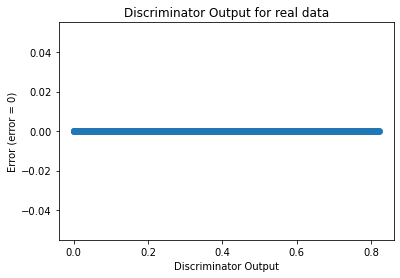

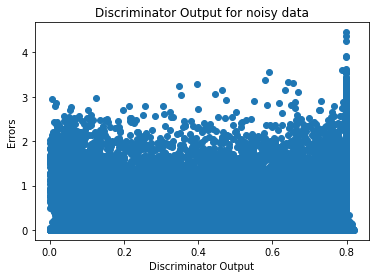

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4543]], device='cuda:0', requires_grad=True)
